# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
unit = "Imperial" 
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: grytviken
City processed: aasiaat
City processed: edinburgh of the seven seas
City processed: yellowknife
City processed: gufeng
City processed: bredasdorp
City processed: itoman
City processed: portel
City processed: hawaiian paradise park
City processed: sierra grande
City processed: bethel
City processed: petropavlovsk-kamchatsky
City processed: sao miguel do araguaia
City processed: amurzet
City processed: pisco
City processed: punta arenas
City processed: port-aux-francais
City NOT found: alotau
City NOT found: cargados carajos
City processed: puerto ayora
City processed: tomatlan
City processed: isafjordur
City processed: newman
City processed: vadso
City processed: adamstown
City processed: waitangi
City processed: ushuaia
City processed: northam
City processed: qaqortoq
City processed: port mathurin
City processed: xining
City processed: albany
City processed: pitimbu
City processed: labrador city
City processed: coronado
City processed: yandev
City processed: o

City NOT found: qal'at bishah
City processed: champerico
City processed: kyelang
City processed: caleta de carquin
City processed: maryville
City processed: madhyamgram
City processed: boundiali
City processed: kailua-kona
City processed: bam
City processed: igarka
City processed: nigel
City processed: port lincoln
City processed: hirara
City processed: guelendeng
City processed: merizo village
City processed: estevan
City processed: fomboni
City processed: palmas
City processed: luderitz
City processed: lichtenburg
City processed: tsiombe
City processed: cill airne
City processed: pont rouge
City processed: puerto baquerizo moreno
City processed: pariaman
City processed: college
City processed: thanh hoa
City processed: bardai
City processed: ban dan lan hoi
City processed: port saint john's
City processed: iskateley
City processed: mukalla
City processed: taradale
City processed: selkirk
City processed: copiapo
City processed: raduzhny
City processed: inhambane
City processed: alagoi

# Convert Raw Data to DataFrame
#### Export the city data into a .csv.
#### Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [5]:
# Export the City_Data into a csv
weather_df.to_csv(r'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Cities.csv', index = False)

weather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,grytviken,GS,21.54,77,30,10.80,-54.2811,-36.5092,1690246746
1,aasiaat,GL,36.41,98,99,4.05,68.7098,-52.8699,1690246746
2,edinburgh of the seven seas,SH,59.02,79,18,37.29,-37.0676,-12.3116,1690246746
3,yellowknife,CA,79.32,34,100,11.50,62.4560,-114.3525,1690246747
4,gufeng,CN,76.71,73,82,3.69,26.9083,118.9819,1690246747
...,...,...,...,...,...,...,...,...,...
570,trincomalee,LK,79.56,77,100,10.18,8.5711,81.2335,1690246842
571,igrim,RU,60.08,92,100,3.89,63.1906,64.4162,1690246842
572,mandapam,IN,81.79,68,100,14.88,9.2833,79.1167,1690246842
573,fortuna,US,68.99,71,0,12.66,40.5982,-124.1573,1690246843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

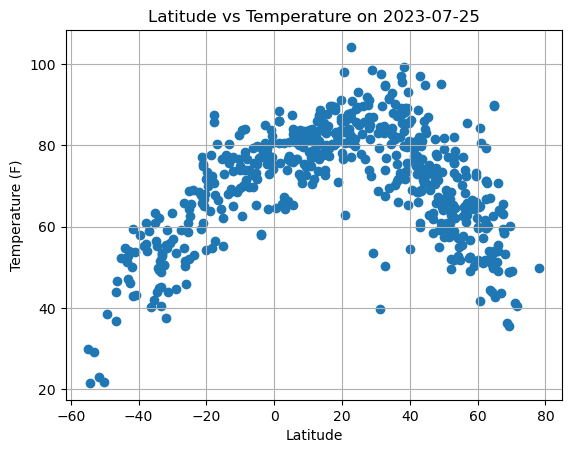

In [6]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = weather_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = weather_df["Latitude"]
y = weather_df["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Latitude vs Temperature on {runDate}.png')
#display plot
plt.show()

#### Latitude Vs. Humidity

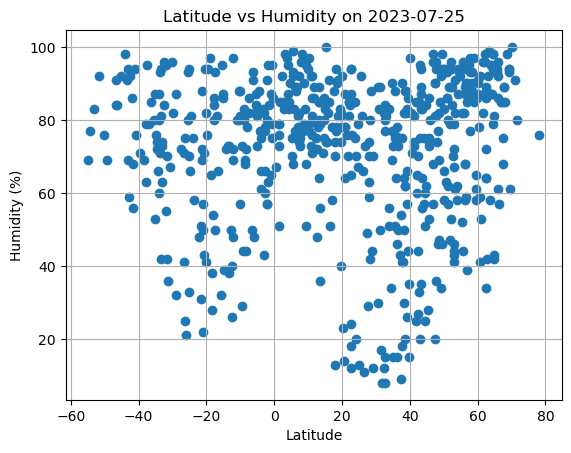

In [7]:
#set data to plot
h = weather_df["Humidity"]
plt.scatter(x,h)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Humidity on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#export as png
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Latitude vs Humidity on {runDate}.png')
#display plot
plt.show()

#### Latitude Vs. Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

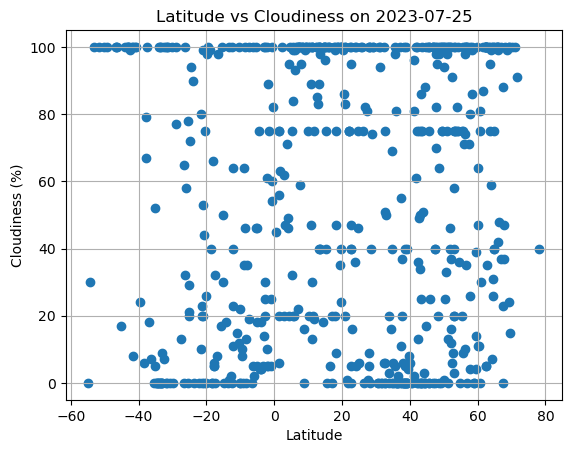

In [8]:
#set data to plot
c = weather_df["Cloudiness"]
plt.scatter(x,c)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#export as png
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Latitude vs Cloudiness on {runDate}.png')
#display plot
plt.show

#### Latitude vs. Wind Speed Plot

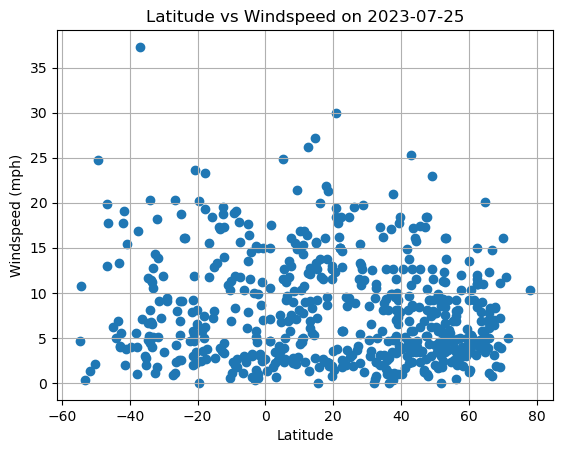

In [9]:
#set data to plot
ws = weather_df["Windspeed"]
plt.scatter(x,ws)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
#export as png
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Latitude vs Windspeed on {runDate}.png')
#display plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = weather_df.loc[weather_df["Latitude"] > 0]
# Display sample data
northern_hemi_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
1,aasiaat,GL,36.41,98,99,4.05,68.7098,-52.8699,1690246746
3,yellowknife,CA,79.32,34,100,11.50,62.4560,-114.3525,1690246747
4,gufeng,CN,76.71,73,82,3.69,26.9083,118.9819,1690246747
6,itoman,JP,89.62,66,75,19.57,26.1247,127.6694,1690246747
8,hawaiian paradise park,US,83.73,78,100,12.66,19.5933,-154.9731,1690246747


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = weather_df.loc[weather_df["Latitude"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,grytviken,GS,21.54,77,30,10.80,-54.2811,-36.5092,1690246746
2,edinburgh of the seven seas,SH,59.02,79,18,37.29,-37.0676,-12.3116,1690246746
5,bredasdorp,ZA,43.99,74,0,4.76,-34.5322,20.0403,1690246747
7,portel,BR,77.76,63,5,3.11,-1.9356,-50.8211,1690246649
9,sierra grande,AR,43.05,56,100,19.06,-41.6060,-65.3557,1690246747


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.6082927372278398
y = -0.4x + 88.35


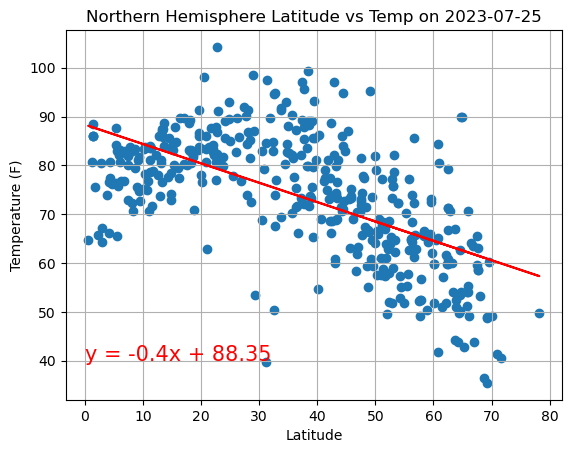

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Temperature"]
regEQplotX = 0
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

The r-square is 0.8463038591150944
y = 0.82x + 80.94


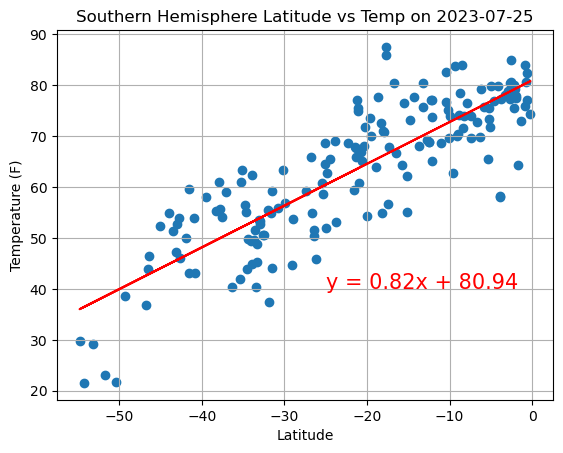

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** The result reveal a strong correlation in both the northern and southern hemispheres between distance from the equator and temperature. The closer a city is to the equator the higher the temperature and the further away from the equator the lower the temperature!

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.02647409200793007
y = 0.03x + 71.04


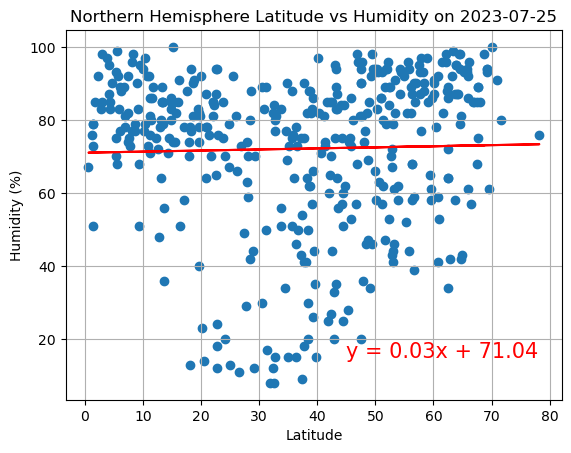

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

The r-square is -0.09374474400326532
y = -0.12x + 68.44


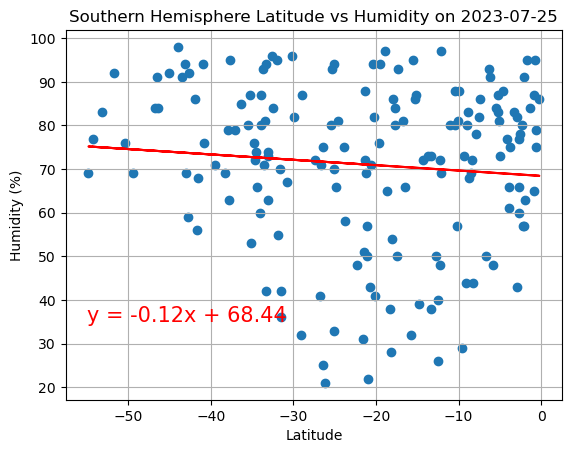

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** No relationship

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is -0.048981769473323125
y = -0.1x + 60.97


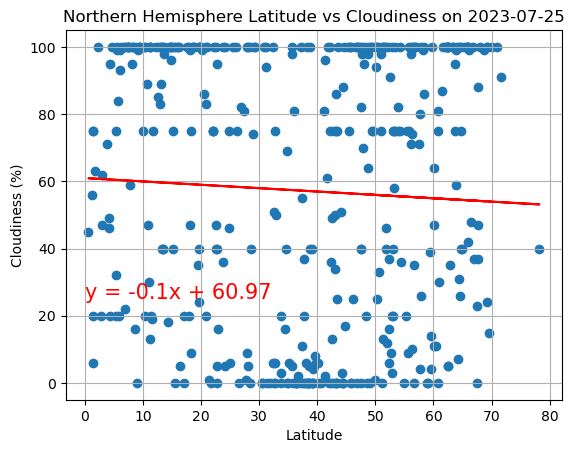

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

The r-square is -0.20914915737893244
y = -0.6x + 30.37


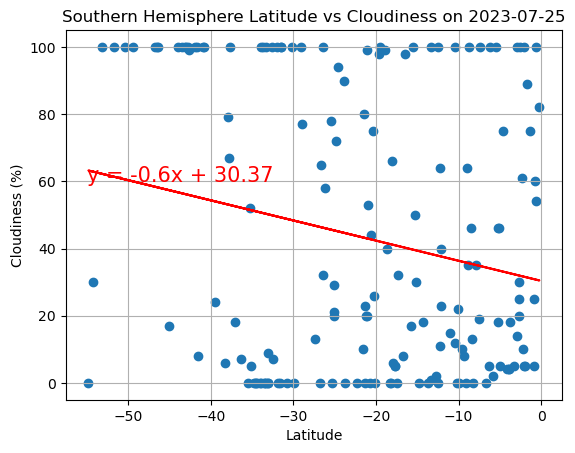

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** No relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is -0.17374495141216284
y = -0.05x + 9.64


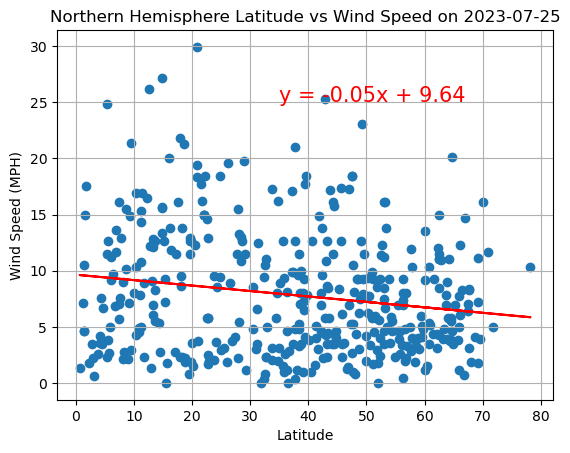

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

The r-square is -0.05670222865380453
y = -0.03x + 7.95


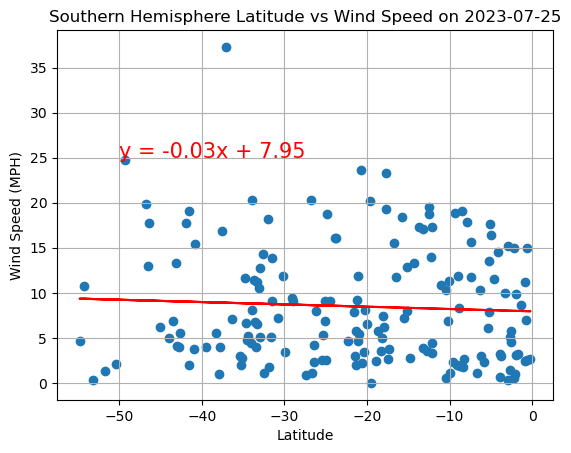

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'C:\\Users\\cdiix\\OneDrive\\Desktop\\python-api-challenge\\WeatherPy\\output_data\\Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

**Discussion about the linear relationship:** No relationship